# Άσκηση 3

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# 1. Φόρτωση και Επιλογή του Dataset II
df = sns.load_dataset('anscombe')
df_ii = df[df['dataset'] == 'II']
X = df_ii[['x']]  # Ανεξάρτητη μεταβλητή
y = df_ii['y']    # Εξαρτημένη μεταβλητή

# 2. Μετασχηματισμός Χαρακτηριστικών (Δημιουργία x^2)
# Καθορίζουμε τον βαθμό (degree) 2 για να συμπεριλάβουμε όρους x και x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# Το fit_transform δημιουργεί ένα νέο πίνακα με τις στήλες [x, x^2]
X_poly = poly_features.fit_transform(X)

print("Πίνακας Χαρακτηριστικών μετά τον μετασχηματισμό (στήλες: x, x^2):")
print(X_poly)

Πίνακας Χαρακτηριστικών μετά τον μετασχηματισμό (στήλες: x, x^2):
[[ 10. 100.]
 [  8.  64.]
 [ 13. 169.]
 [  9.  81.]
 [ 11. 121.]
 [ 14. 196.]
 [  6.  36.]
 [  4.  16.]
 [ 12. 144.]
 [  7.  49.]
 [  5.  25.]]


In [15]:
# 3. Εφαρμογή Γραμμικής Παλινδρόμησης στον Μετασχηματισμένο Πίνακα
# Αυτό είναι πλέον πολυωνυμική παλινδρόμηση: Y = a + b1*x + b2*x^2
model = LinearRegression()
model.fit(X_poly, y);

In [ ]:
# 4. Οπτικοποίηση
# Δημιουργία σημείων x για την ομαλή γραμμή
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Μετασχηματισμός και αυτών των σημείων με τους ίδιους πολυωνυμικούς όρους
X_plot_poly = poly_features.transform(X_plot)
y_poly_pred = model.predict(X_plot_poly)


/Users/chgogos/git_repos/dituoi_assignments/ekdda_dawp/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


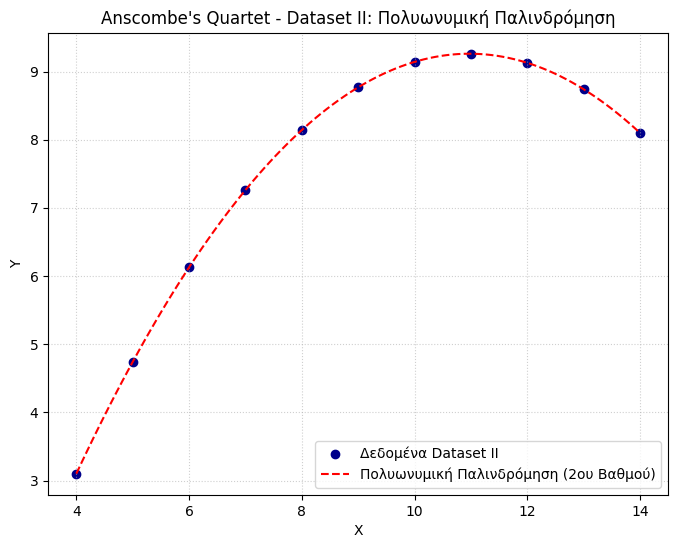

In [13]:
# 5. Οπτικοποίηση
plt.figure(figsize=(8, 6))
plt.scatter(df_ii['x'], df_ii['y'], label='Δεδομένα Dataset II', color='darkblue')
plt.plot(X_plot, y_poly_pred, label='Πολυωνυμική Παλινδρόμηση (2ου Βαθμού)', color='red', linestyle='--')

plt.title("Anscombe's Quartet - Dataset II: Πολυωνυμική Παλινδρόμηση")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [14]:
# 6. Εξαγωγή Συντελεστών
# Συντελεστές: [b1, b2], όπου b1 αντιστοιχεί στο x και b2 στο x^2
print("\nΑποτελέσματα Πολυωνυμικής Παλινδρόμησης (2ου Βαθμού):")
print(f"Σταθερός Όρος (Intercept): {model.intercept_:.4f}")
print(f"Συντελεστές (Coefficients): {model.coef_}")
print(f"-> Συντελεστής για x (b1): {model.coef_[0]:.4f}")
print(f"-> Συντελεστής για x^2 (b2): {model.coef_[1]:.4f}")


Αποτελέσματα Πολυωνυμικής Παλινδρόμησης (2ου Βαθμού):
Σταθερός Όρος (Intercept): -5.9957
Συντελεστές (Coefficients): [ 2.78083916 -0.12671329]
-> Συντελεστής για x (b1): 2.7808
-> Συντελεστής για x^2 (b2): -0.1267
